In [23]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [24]:
ford_raw = pd.read_csv("C:\\Users\\SUKHJIT\\Documents\\AMS325-FinalProject\\AMS325-RawProjectData\\Ford_stocks.csv", parse_dates=['Date'])
#parsed the date column into date format
print(ford_raw)

ford_proc = ford_raw.drop(columns=['Open','High','Low','Adj Close','Volume'])
ford_proc["Percent Change"] = ford_proc['Close'].pct_change()*100

start = (np.where(ford_proc['Date'] == datetime.datetime(2015, 1, 2))[0])[0]
end = (np.where(ford_proc['Date'] == datetime.datetime(2019, 12, 31))[0])[0]+1
ford_proc = ford_proc[start:end]

print(ford_proc)
#Left with Close and Percent Change of Close Columns from Jan 2 2015 to end of 2019

#summary statistics of percent change column
ave_fordoverall = ford_proc['Percent Change'].describe()['mean']
print('Overall average percent change:', ave_fordoverall)

            Date       Open       High        Low      Close  Adj Close  \
0     1972-06-01   0.000000   2.173495   2.149165   2.153220   0.115848   
1     1972-06-02   2.153220   2.173495   2.141055   2.149165   0.115630   
2     1972-06-05   2.149165   2.169440   2.141055   2.149165   0.115630   
3     1972-06-06   2.149165   2.157275   2.116725   2.124835   0.114321   
4     1972-06-07   2.124835   2.137000   2.112670   2.112670   0.113666   
...          ...        ...        ...        ...        ...        ...   
12558 2022-03-18  16.420000  16.900000  16.280001  16.860001  16.860001   
12559 2022-03-21  16.870001  17.110001  16.330000  16.480000  16.480000   
12560 2022-03-22  16.719999  17.309999  16.700001  17.090000  17.090000   
12561 2022-03-23  16.820000  17.049999  16.570000  16.680000  16.680000   
12562 2022-03-24  16.740000  16.980000  16.639999  16.830000  16.830000   

         Volume  
0       1091238  
1       1174468  
2       5209582  
3       1424158  
4        

In [25]:
#this stores the overall average during this time period
print(ford_proc)
ave_ford_overall = ford_proc['Percent Change'].describe()['mean']

#in this code, th15s correfordonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
th15s = (np.where(ford_proc['Date'] == datetime.datetime(2015, 11, 24))[0])[0]
th15e = (np.where(ford_proc['Date'] == datetime.datetime(2015, 11, 30))[0])[0]+1
th16s = (np.where(ford_proc['Date'] == datetime.datetime(2016, 11, 22))[0])[0]
th16e = (np.where(ford_proc['Date'] == datetime.datetime(2016, 11, 28))[0])[0]+1
th17s = (np.where(ford_proc['Date'] == datetime.datetime(2017, 11, 21))[0])[0]
th17e = (np.where(ford_proc['Date'] == datetime.datetime(2017, 11, 27))[0])[0]+1
th18s = (np.where(ford_proc['Date'] == datetime.datetime(2018, 11, 20))[0])[0]
th18e = (np.where(ford_proc['Date'] == datetime.datetime(2018, 11, 26))[0])[0]+1
th19s = (np.where(ford_proc['Date'] == datetime.datetime(2019, 11, 26))[0])[0]
th19e = (np.where(ford_proc['Date'] == datetime.datetime(2019, 12, 2))[0])[0]+1
print(th15s, th15e, th16s, th16e, th17s, th17e, th18s, th18e, th19s, th19e)

#This concatenates the 5 selected intervals into one dataframe, ford_th, which contains the thanksgivings for this stock, S&P 500
ford_th = pd.concat([ford_proc.iloc[th15s:th15e],ford_proc.iloc[th16s:th16e],ford_proc.iloc[th17s:th17e],ford_proc.iloc[th18s:th18e],ford_proc.iloc[th19s:th19e],], ignore_index=True)
print(ford_th)

#this line obtains the mean of the thanksgiving data
ave_fordth = ford_th['Percent Change'].describe()['mean']
print(ave_fordth, ave_ford_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.839, the answer is no signficant differents
statistic, pvalue_fordth = stats.ttest_ind(a=ford_proc['Percent Change'], b=ford_th['Percent Change'], equal_var=False)
print(pvalue_fordth)

            Date  Close  Percent Change
10743 2015-01-02  15.36       -0.903226
10744 2015-01-05  14.76       -3.906250
10745 2015-01-06  14.62       -0.948509
10746 2015-01-07  15.04        2.872777
10747 2015-01-08  15.42        2.526596
...          ...    ...             ...
11996 2019-12-24   9.47        0.317797
11997 2019-12-26   9.45       -0.211193
11998 2019-12-27   9.36       -0.952381
11999 2019-12-30   9.25       -1.175214
12000 2019-12-31   9.30        0.540541

[1258 rows x 3 columns]
226 230 477 481 728 732 979 983 1234 1238
         Date  Close  Percent Change
0  2015-11-24  14.55        0.000000
1  2015-11-25  14.55        0.000000
2  2015-11-27  14.53       -0.137457
3  2015-11-30  14.33       -1.376462
4  2016-11-22  11.89        0.848176
5  2016-11-23  11.90        0.084104
6  2016-11-25  12.04        1.176471
7  2016-11-28  11.92       -0.996678
8  2017-11-21  12.12       -0.082440
9  2017-11-22  12.07       -0.412541
10 2017-11-24  12.10        0.248550
11 2017-1

In [26]:
#in this code, th15s correfordonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
va15s = (np.where(ford_proc['Date'] == datetime.datetime(2015, 2, 12))[0])[0]
va15e = (np.where(ford_proc['Date'] == datetime.datetime(2015, 2, 18))[0])[0]+1
va16s = (np.where(ford_proc['Date'] == datetime.datetime(2016, 2, 11))[0])[0]
va16e = (np.where(ford_proc['Date'] == datetime.datetime(2016, 2, 17))[0])[0]+1
va17s = (np.where(ford_proc['Date'] == datetime.datetime(2017, 2, 10))[0])[0]
va17e = (np.where(ford_proc['Date'] == datetime.datetime(2017, 2, 16))[0])[0]+1
va18s = (np.where(ford_proc['Date'] == datetime.datetime(2018, 2, 12))[0])[0]
va18e = (np.where(ford_proc['Date'] == datetime.datetime(2018, 2, 16))[0])[0]+1
va19s = (np.where(ford_proc['Date'] == datetime.datetime(2019, 2, 12))[0])[0]
va19e = (np.where(ford_proc['Date'] == datetime.datetime(2019, 2, 19))[0])[0]+1
print(va15s, va15e, va16s, va16e, va17s, va17e, va18s, va18e, va19s, va19e)

#This concatenates the 5 selected intervals into one dataframe, ford_va, which contains the thanksgivings for vais stock, S&P 500
ford_va = pd.concat([ford_proc.iloc[va15s:va15e],ford_proc.iloc[va16s:va16e],ford_proc.iloc[va17s:va17e],ford_proc.iloc[va18s:va18e],ford_proc.iloc[va19s:va19e],], ignore_index=True)
print(ford_va)

#this line obtains the mean of the thanksgiving data
ave_fordva = ford_va['Percent Change'].describe()['mean']
print(ave_fordva, ave_ford_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.0015, the answer is a signficant difference
#the valentines day performance is higher
statistic, pvalue_fordva = stats.ttest_ind(a=ford_proc['Percent Change'], b=ford_va['Percent Change'], equal_var=False)
print(pvalue_fordva)

28 32 279 283 531 536 783 788 1034 1039
         Date      Close  Percent Change
0  2015-02-12  16.360001        0.676929
1  2015-02-13  16.299999       -0.366760
2  2015-02-17  16.110001       -1.165632
3  2015-02-18  16.209999        0.620720
4  2016-02-11  11.170000       -1.499118
5  2016-02-12  11.550000        3.401970
6  2016-02-16  11.870000        2.770563
7  2016-02-17  12.270000        3.369840
8  2017-02-10  12.510000        1.050081
9  2017-02-13  12.560000        0.399680
10 2017-02-14  12.650000        0.716561
11 2017-02-15  12.630000       -0.158103
12 2017-02-16  12.540000       -0.712589
13 2018-02-12  10.700000        1.614435
14 2018-02-13  10.590000       -1.028037
15 2018-02-14  10.740000        1.416431
16 2018-02-15  10.760000        0.186220
17 2018-02-16  10.610000       -1.394052
18 2019-02-12   8.460000        1.560624
19 2019-02-13   8.410000       -0.591017
20 2019-02-14   8.420000        0.118906
21 2019-02-15   8.540000        1.425178
22 2019-02-19   8

In [27]:
#in this code, th15s correfordonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
fj15s = (np.where(ford_proc['Date'] == datetime.datetime(2015, 7, 1))[0])[0]
fj15e = (np.where(ford_proc['Date'] == datetime.datetime(2015, 7, 7))[0])[0]+1
fj16s = (np.where(ford_proc['Date'] == datetime.datetime(2016, 6, 30))[0])[0]
fj16e = (np.where(ford_proc['Date'] == datetime.datetime(2016, 7, 6))[0])[0]+1
fj17s = (np.where(ford_proc['Date'] == datetime.datetime(2017, 6, 30))[0])[0]
fj17e = (np.where(ford_proc['Date'] == datetime.datetime(2017, 7, 6))[0])[0]+1
fj18s = (np.where(ford_proc['Date'] == datetime.datetime(2018, 7, 2))[0])[0]
fj18e = (np.where(ford_proc['Date'] == datetime.datetime(2018, 7, 6))[0])[0]+1
fj19s = (np.where(ford_proc['Date'] == datetime.datetime(2019, 7, 2))[0])[0]
fj19e = (np.where(ford_proc['Date'] == datetime.datetime(2019, 7, 8))[0])[0]+1
print(fj15s, fj15e, fj16s, fj16e, fj17s, fj17e, fj18s, fj18e, fj19s, fj19e)

#This concatenates the 5 selected intervals into one dataframe, ford_fj, which contains the thanksgivings for vais stock, S&P 500
ford_fj = pd.concat([ford_proc.iloc[fj15s:fj15e],ford_proc.iloc[fj16s:fj16e],ford_proc.iloc[fj17s:fj17e],ford_proc.iloc[fj18s:fj18e],ford_proc.iloc[fj19s:fj19e],], ignore_index=True)
print(ford_fj)

#this line obtains the mean of the thanksgiving data
ave_fordfj = ford_fj['Percent Change'].describe()['mean']
print(ave_fordfj, ave_ford_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.207, the conclusion is that the differences are insignificant
statistic, pvalue_fordfj = stats.ttest_ind(a=ford_proc['Percent Change'], b=ford_fj['Percent Change'], equal_var=False)
print(pvalue_fordfj)

124 128 376 380 628 632 880 884 1131 1135
         Date  Close  Percent Change
0  2015-07-01  14.99       -0.133245
1  2015-07-02  14.87       -0.800534
2  2015-07-06  14.79       -0.537996
3  2015-07-07  14.85        0.405680
4  2016-06-30  12.57        0.159363
5  2016-07-01  12.72        1.193317
6  2016-07-05  12.40       -2.515723
7  2016-07-06  12.57        1.370968
8  2017-06-30  11.19        0.179051
9  2017-07-03  11.56        3.306524
10 2017-07-05  11.30       -2.249135
11 2017-07-06  11.18       -1.061947
12 2018-07-02  11.10        0.271003
13 2018-07-03  10.99       -0.990991
14 2018-07-05  11.05        0.545951
15 2018-07-06  11.06        0.090498
16 2019-07-02  10.12       -0.295567
17 2019-07-03  10.20        0.790514
18 2019-07-05  10.20        0.000000
19 2019-07-08  10.20        0.000000
-0.013613484385560093 -0.028567973755406668
0.9585759254348646


In [28]:
#in this code, th15s correfordonds to th = thanksgiving, 15 = year 2015, and s = start of 4-5 business day interval
#the years change for each one to be included in the analysis
#the dates listed in each statement are the start / end date to be included in the analysis
ch15s = (np.where(ford_proc['Date'] == datetime.datetime(2015, 12, 23))[0])[0]
ch15e = (np.where(ford_proc['Date'] == datetime.datetime(2015, 12, 29))[0])[0]+1
ch16s = (np.where(ford_proc['Date'] == datetime.datetime(2016, 12, 22))[0])[0]
ch16e = (np.where(ford_proc['Date'] == datetime.datetime(2016, 12, 28))[0])[0]+1
ch17s = (np.where(ford_proc['Date'] == datetime.datetime(2017, 12, 21))[0])[0]
ch17e = (np.where(ford_proc['Date'] == datetime.datetime(2017, 12, 27))[0])[0]+1
ch18s = (np.where(ford_proc['Date'] == datetime.datetime(2018, 12, 20))[0])[0]
ch18e = (np.where(ford_proc['Date'] == datetime.datetime(2018, 12, 27))[0])[0]+1
ch19s = (np.where(ford_proc['Date'] == datetime.datetime(2019, 12, 20))[0])[0]
ch19e = (np.where(ford_proc['Date'] == datetime.datetime(2019, 12, 27))[0])[0]+1
print(ch15s, ch15e, ch16s, ch16e, ch17s, ch17e, ch18s, ch18e, ch19s, ch19e)

#This concatenates the 5 selected intervals into one dataframe, ford_ch, which contains the thanksgivings for vais stock, S&P 500
ford_ch = pd.concat([ford_proc.iloc[ch15s:ch15e],ford_proc.iloc[ch16s:ch16e],ford_proc.iloc[ch17s:ch17e],ford_proc.iloc[ch18s:ch18e],ford_proc.iloc[ch19s:ch19e],], ignore_index=True)
print(ford_ch)

#this line obtains the mean of the thanksgiving data
ave_fordch = ford_ch['Percent Change'].describe()['mean']
print(ave_fordch, ave_ford_overall)

#Outputs t-test for significance of difference from overall performance during this time
#In this case, with a pvalue of 0.786, the conclusion is that the differences are insignificant
statistic, pvalue_fordch = stats.ttest_ind(a=ford_proc['Percent Change'], b=ford_ch['Percent Change'], equal_var=False)
print(pvalue_fordch)

246 250 498 502 749 753 999 1004 1251 1256
         Date  Close  Percent Change
0  2015-12-23  14.36        1.126761
1  2015-12-24  14.31       -0.348189
2  2015-12-28  14.18       -0.908456
3  2015-12-29  14.23        0.352609
4  2016-12-22  12.40       -1.898734
5  2016-12-23  12.46        0.483871
6  2016-12-27  12.39       -0.561798
7  2016-12-28  12.25       -1.129944
8  2017-12-21  12.63       -0.707547
9  2017-12-22  12.58       -0.395883
10 2017-12-26  12.60        0.158983
11 2017-12-27  12.50       -0.793651
12 2018-12-20   8.26       -0.721154
13 2018-12-21   8.05       -2.542373
14 2018-12-24   7.63       -5.217391
15 2018-12-26   7.85        2.883355
16 2018-12-27   7.85        0.000000
17 2019-12-20   9.48        0.743889
18 2019-12-23   9.44       -0.421941
19 2019-12-24   9.47        0.317797
20 2019-12-26   9.45       -0.211193
21 2019-12-27   9.36       -0.952381
-0.4883349905222081 -0.028567973755406668
0.1722473801679113


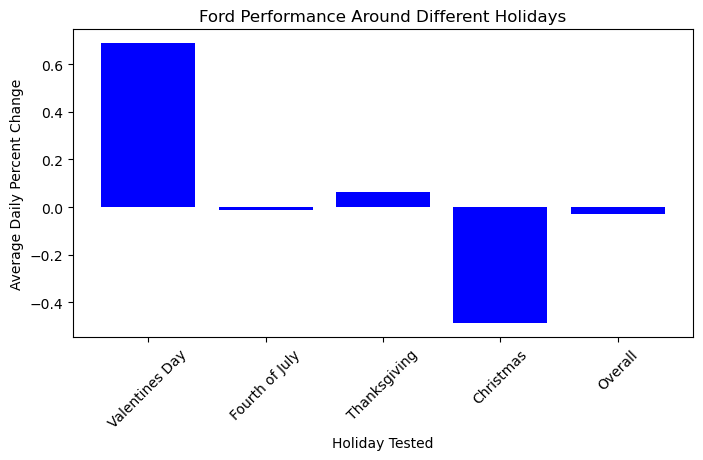

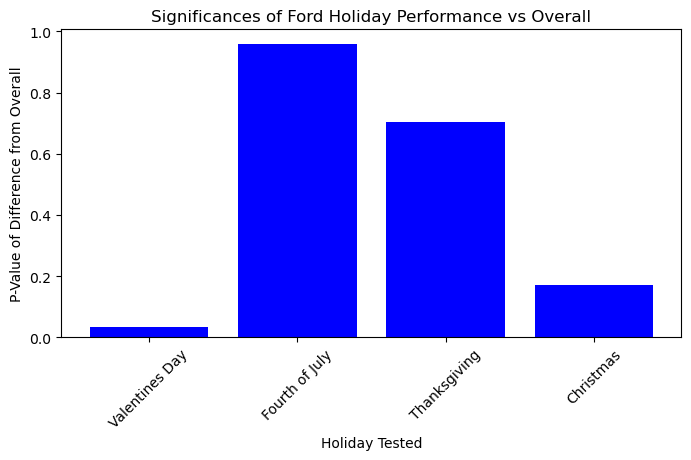

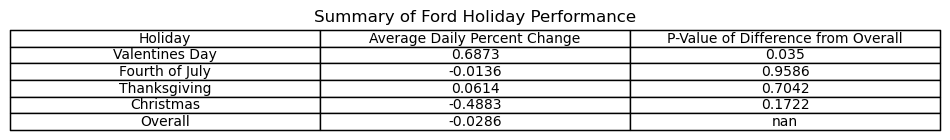

In [29]:
ford_summary = pd.DataFrame({'Holiday': ['Valentines Day', 'Fourth of July', 'Thanksgiving', 'Christmas', 'Overall'], 
              'Average Daily Percent Change': [ave_fordva, ave_fordfj, ave_fordth, ave_fordch, ave_fordoverall], 'P-Value of Difference from Overall':[pvalue_fordva, pvalue_fordfj, pvalue_fordth, pvalue_fordch, None]})

#First, bar graph showing the daily performance around holidays is shown
plt.figure(figsize=(8, 4))
plt.bar(ford_summary['Holiday'], ford_summary['Average Daily Percent Change'], color='b')
plt.title('Ford Performance Around Different Holidays')
plt.xlabel('Holiday Tested')
plt.ylabel('Average Daily Percent Change')
plt.xticks(rotation=45)
plt.savefig('ford_holidays_pct_chg.jpg', bbox_inches="tight")
plt.show()

#Next, the p-value of the difference from the overall performance is shown
plt.figure(figsize=(8, 4))
plt.bar(ford_summary[0:4]['Holiday'], ford_summary[0:4]['P-Value of Difference from Overall'], color='b')
plt.title('Significances of Ford Holiday Performance vs Overall')
plt.xlabel('Holiday Tested')
plt.ylabel('P-Value of Difference from Overall')
plt.xticks(rotation=45)
plt.savefig('ford_holidays_pvalues_chg.jpg', bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 1.3))
plt.title('Summary of Ford Holiday Performance')
plt.table(cellText = ford_summary.round(4).values, colLabels= ford_summary.columns,
              loc='center',cellLoc='center')
plt.xticks([])
plt.yticks([])
plt.savefig('ford_holidays_table.jpg', bbox_inches="tight")
plt.show()

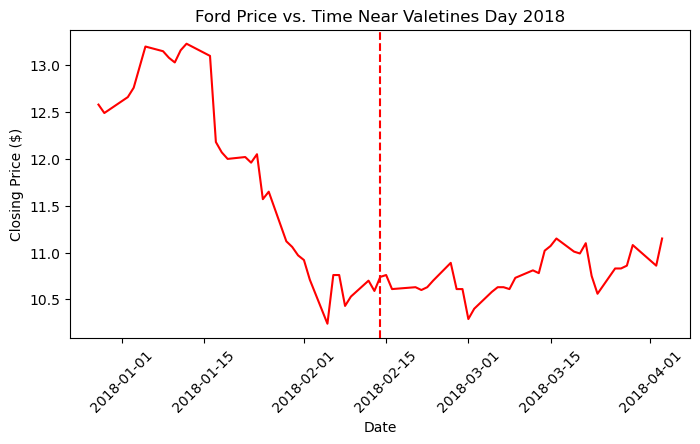

In [30]:
plt.figure(figsize=(8, 4))
plt.plot(ford_proc.iloc[va18s-30:va18e+30]['Date'], ford_proc.iloc[va18s-30:va18e+30]['Close'], linestyle='-', color='r')
plt.title('Ford Price vs. Time Near Valetines Day 2018')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.xticks(rotation=45)
plt.axvline(x = datetime.datetime(2018, 2, 14), color = 'r', linestyle = '--')
plt.savefig('ford_prices_va2018.jpg', bbox_inches="tight")
plt.show()